In [34]:
# importar csv
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [35]:
#guardar en un carpeta aparte (Data)  (index false, asi no los guarda con los numeros de cada filas)
df.to_csv('../data/raw/df_NYC_airbnb.csv', index=False)

In [36]:
#obtener datos 
df.shape

(48895, 16)

In [5]:
# que tipo de info tenemos 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [37]:
#Eliminar duplicados (que influyan como los name or ID,  no deberian tener duplicados)
#primero saber cuales son los duplicados
print(df['name'].duplicated().sum())
print(df['host_id'].duplicated().sum())
print(df['id'].duplicated().sum())

989
11438
0


In [38]:
#eliminar info irrelevante para hacer analisis  // axis para eliminar las columnas // inplace para hacer los cambios en el df


df.drop(['id', 'name', 'host_id', 'host_name', 'last_review', 'reviews_per_month'], axis=1, inplace=True)
## pero por queeeee sale error 
df.head()


,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,1,0


<Axes: xlabel='availability_365', ylabel='Count'>

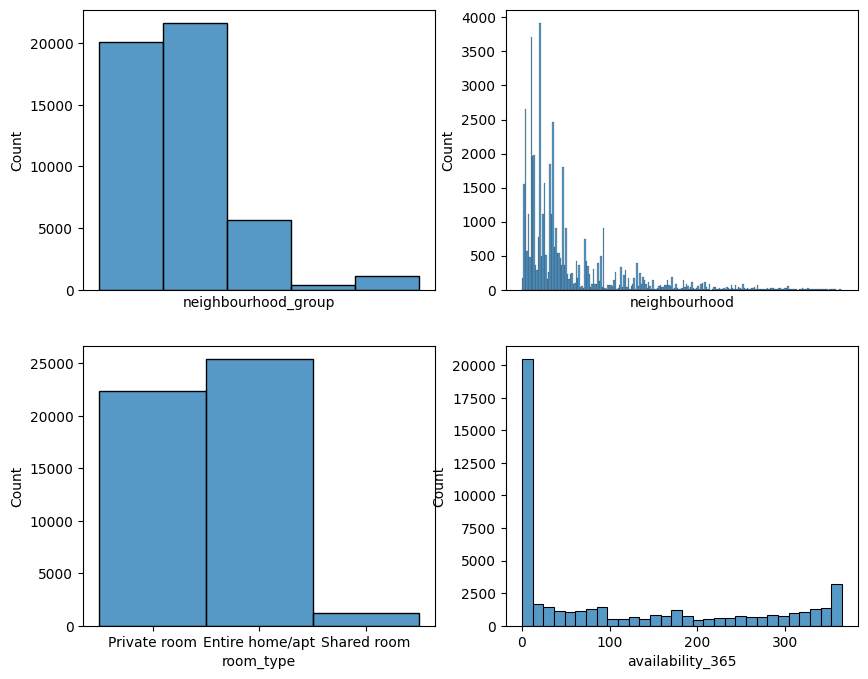

In [27]:
import matplotlib.pyplot as plt 
import seaborn as sns
#analisis categorico 
fig, axis = plt.subplots(2, 2, figsize=(10, 8))
#.set_xticks([]) para eliminar las marcas del eje x 

sns.histplot(ax = axis[0,0], data = df, x = 'neighbourhood_group').set_xticks([])
sns.histplot(ax = axis[0,1], data = df, x = 'neighbourhood').set_xticks([])
sns.histplot(ax = axis[1,0], data = df, x = 'room_type')
sns.histplot(ax = axis[1,1], data = df, x = 'availability_365')


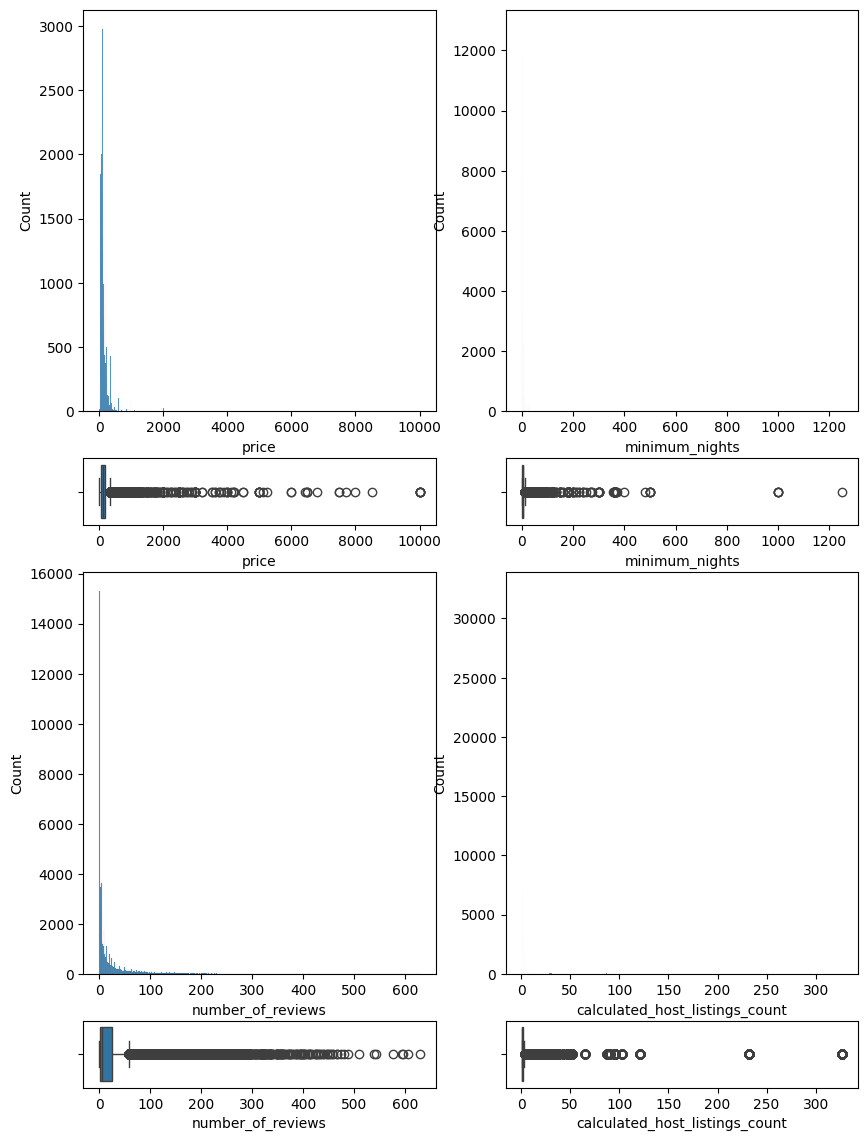

In [29]:
## variables numericas ## gridspec configurar la distribución de filas en una cuadrícula
## se puede condear con los espacios 

fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "price")
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = df, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = df, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = df, x = "calculated_host_listings_count")

plt.show()

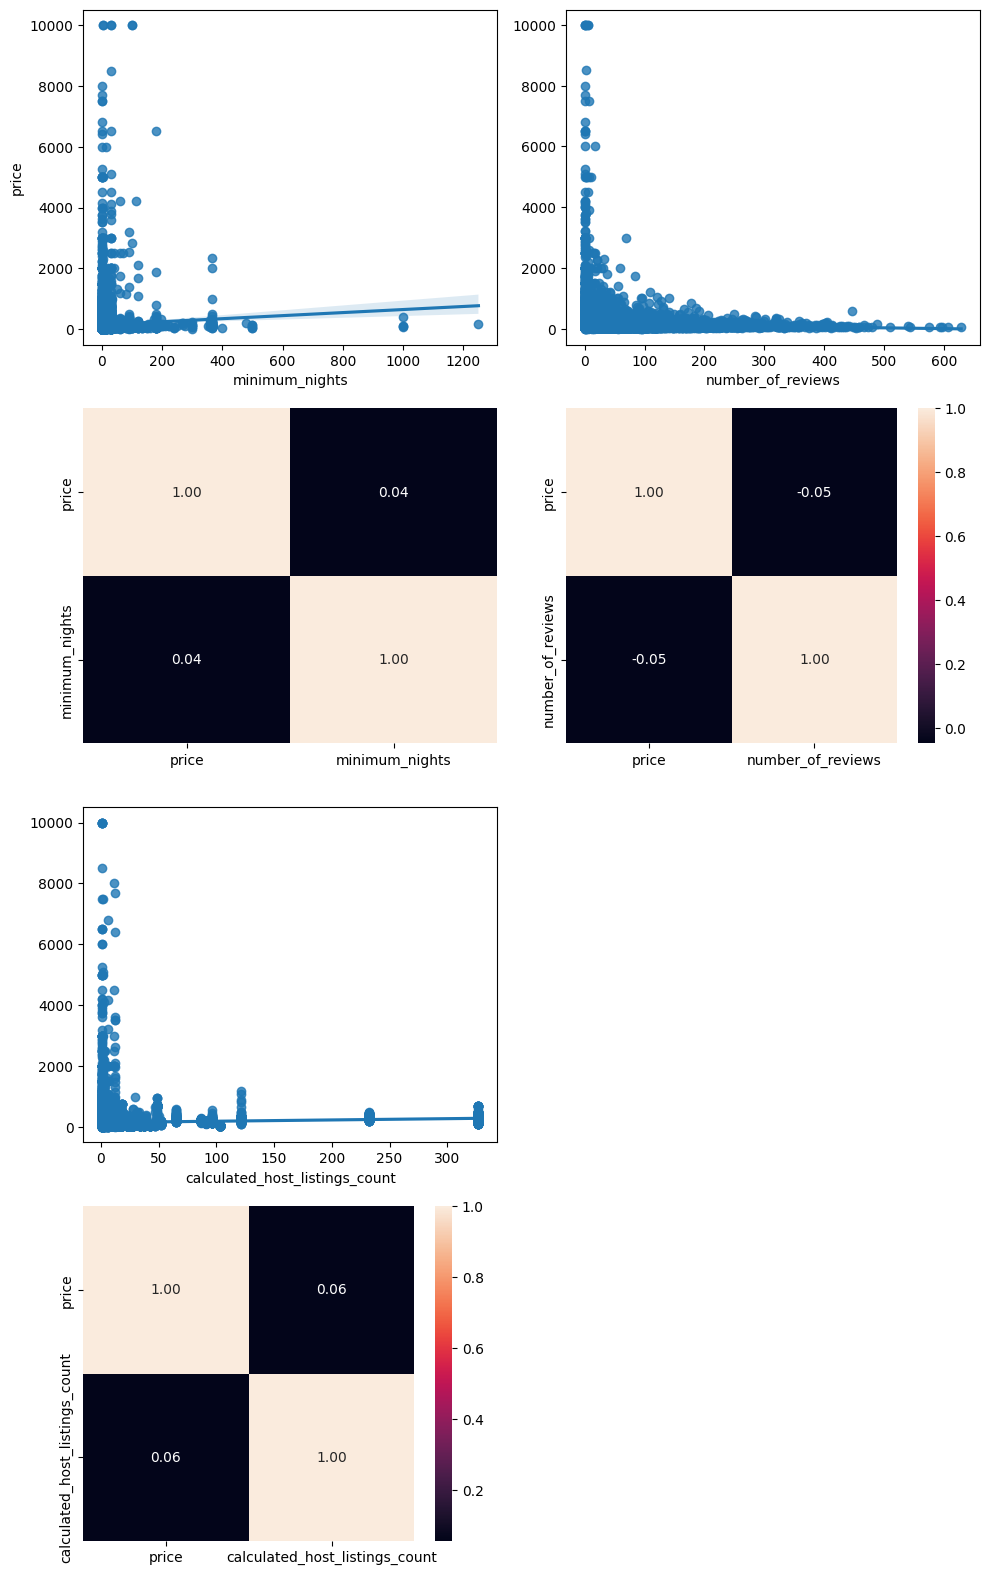

In [32]:
# analisis multivariable 
#numerico numerico

fig, axis = plt.subplots(4, 2, figsize = (10, 16))

sns.regplot(ax = axis[0, 0], data = df, x = "minimum_nights", y = "price")
sns.heatmap(df[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

sns.regplot(ax = axis[0, 1], data = df, x = "number_of_reviews", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

sns.regplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count", y = "price").set(ylabel = None)
sns.heatmap(df[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[3, 0]).set(ylabel = None)
fig.delaxes(axis[2, 1])
fig.delaxes(axis[3, 1])

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

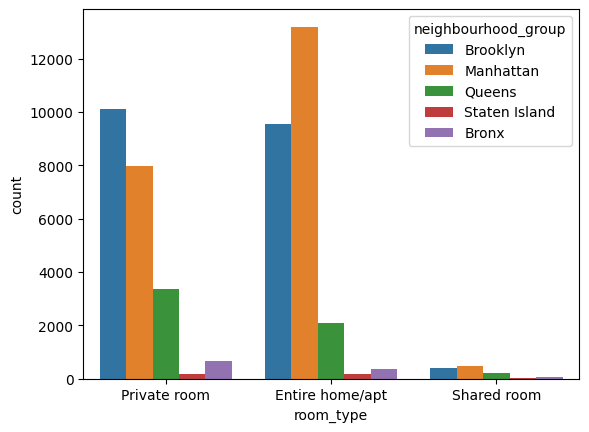

In [40]:
##categorica - categorica 
#hue es agregar una dimensión adicional a tu gráfico

sns.countplot(data=df, x='room_type', hue='neighbourhood_group')
plt.show()


In [43]:
##numnero categorica

df['room_type'] = pd.factorize(df['room_type'])[0]
df['neighbourhood_group'] = pd.factorize(df['neighbourhood_group'])[0]
df['neighbourhood'] = pd.factorize(df['neighbourhood'])[0]

df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,0,0,40.64749,-73.97237,0,149,1,9,6,365
1,1,1,40.75362,-73.98377,1,225,1,45,2,355
2,1,2,40.80902,-73.94190,0,150,3,0,1,365
3,0,3,40.68514,-73.95976,1,89,1,270,1,194
4,1,4,40.79851,-73.94399,1,80,10,9,1,0


<Axes: >

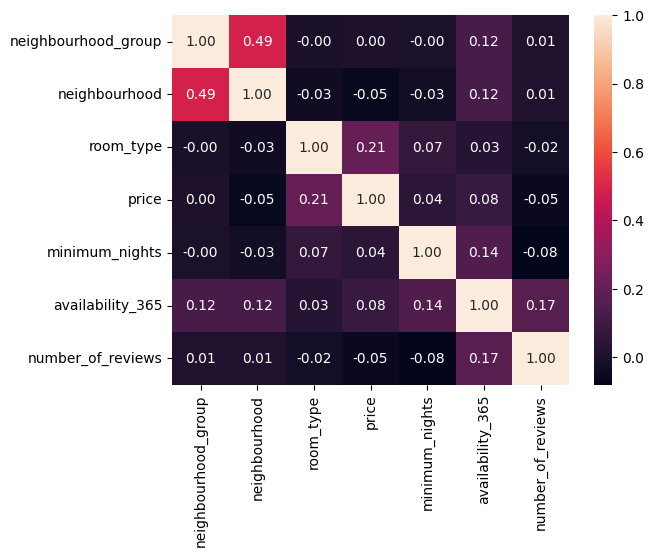

In [46]:
#para que es count??
sns.heatmap(df[['neighbourhood_group', 'neighbourhood', 'room_type', 'price', 'minimum_nights', 'availability_365', 'number_of_reviews']].corr() , annot=True, fmt='.2f')

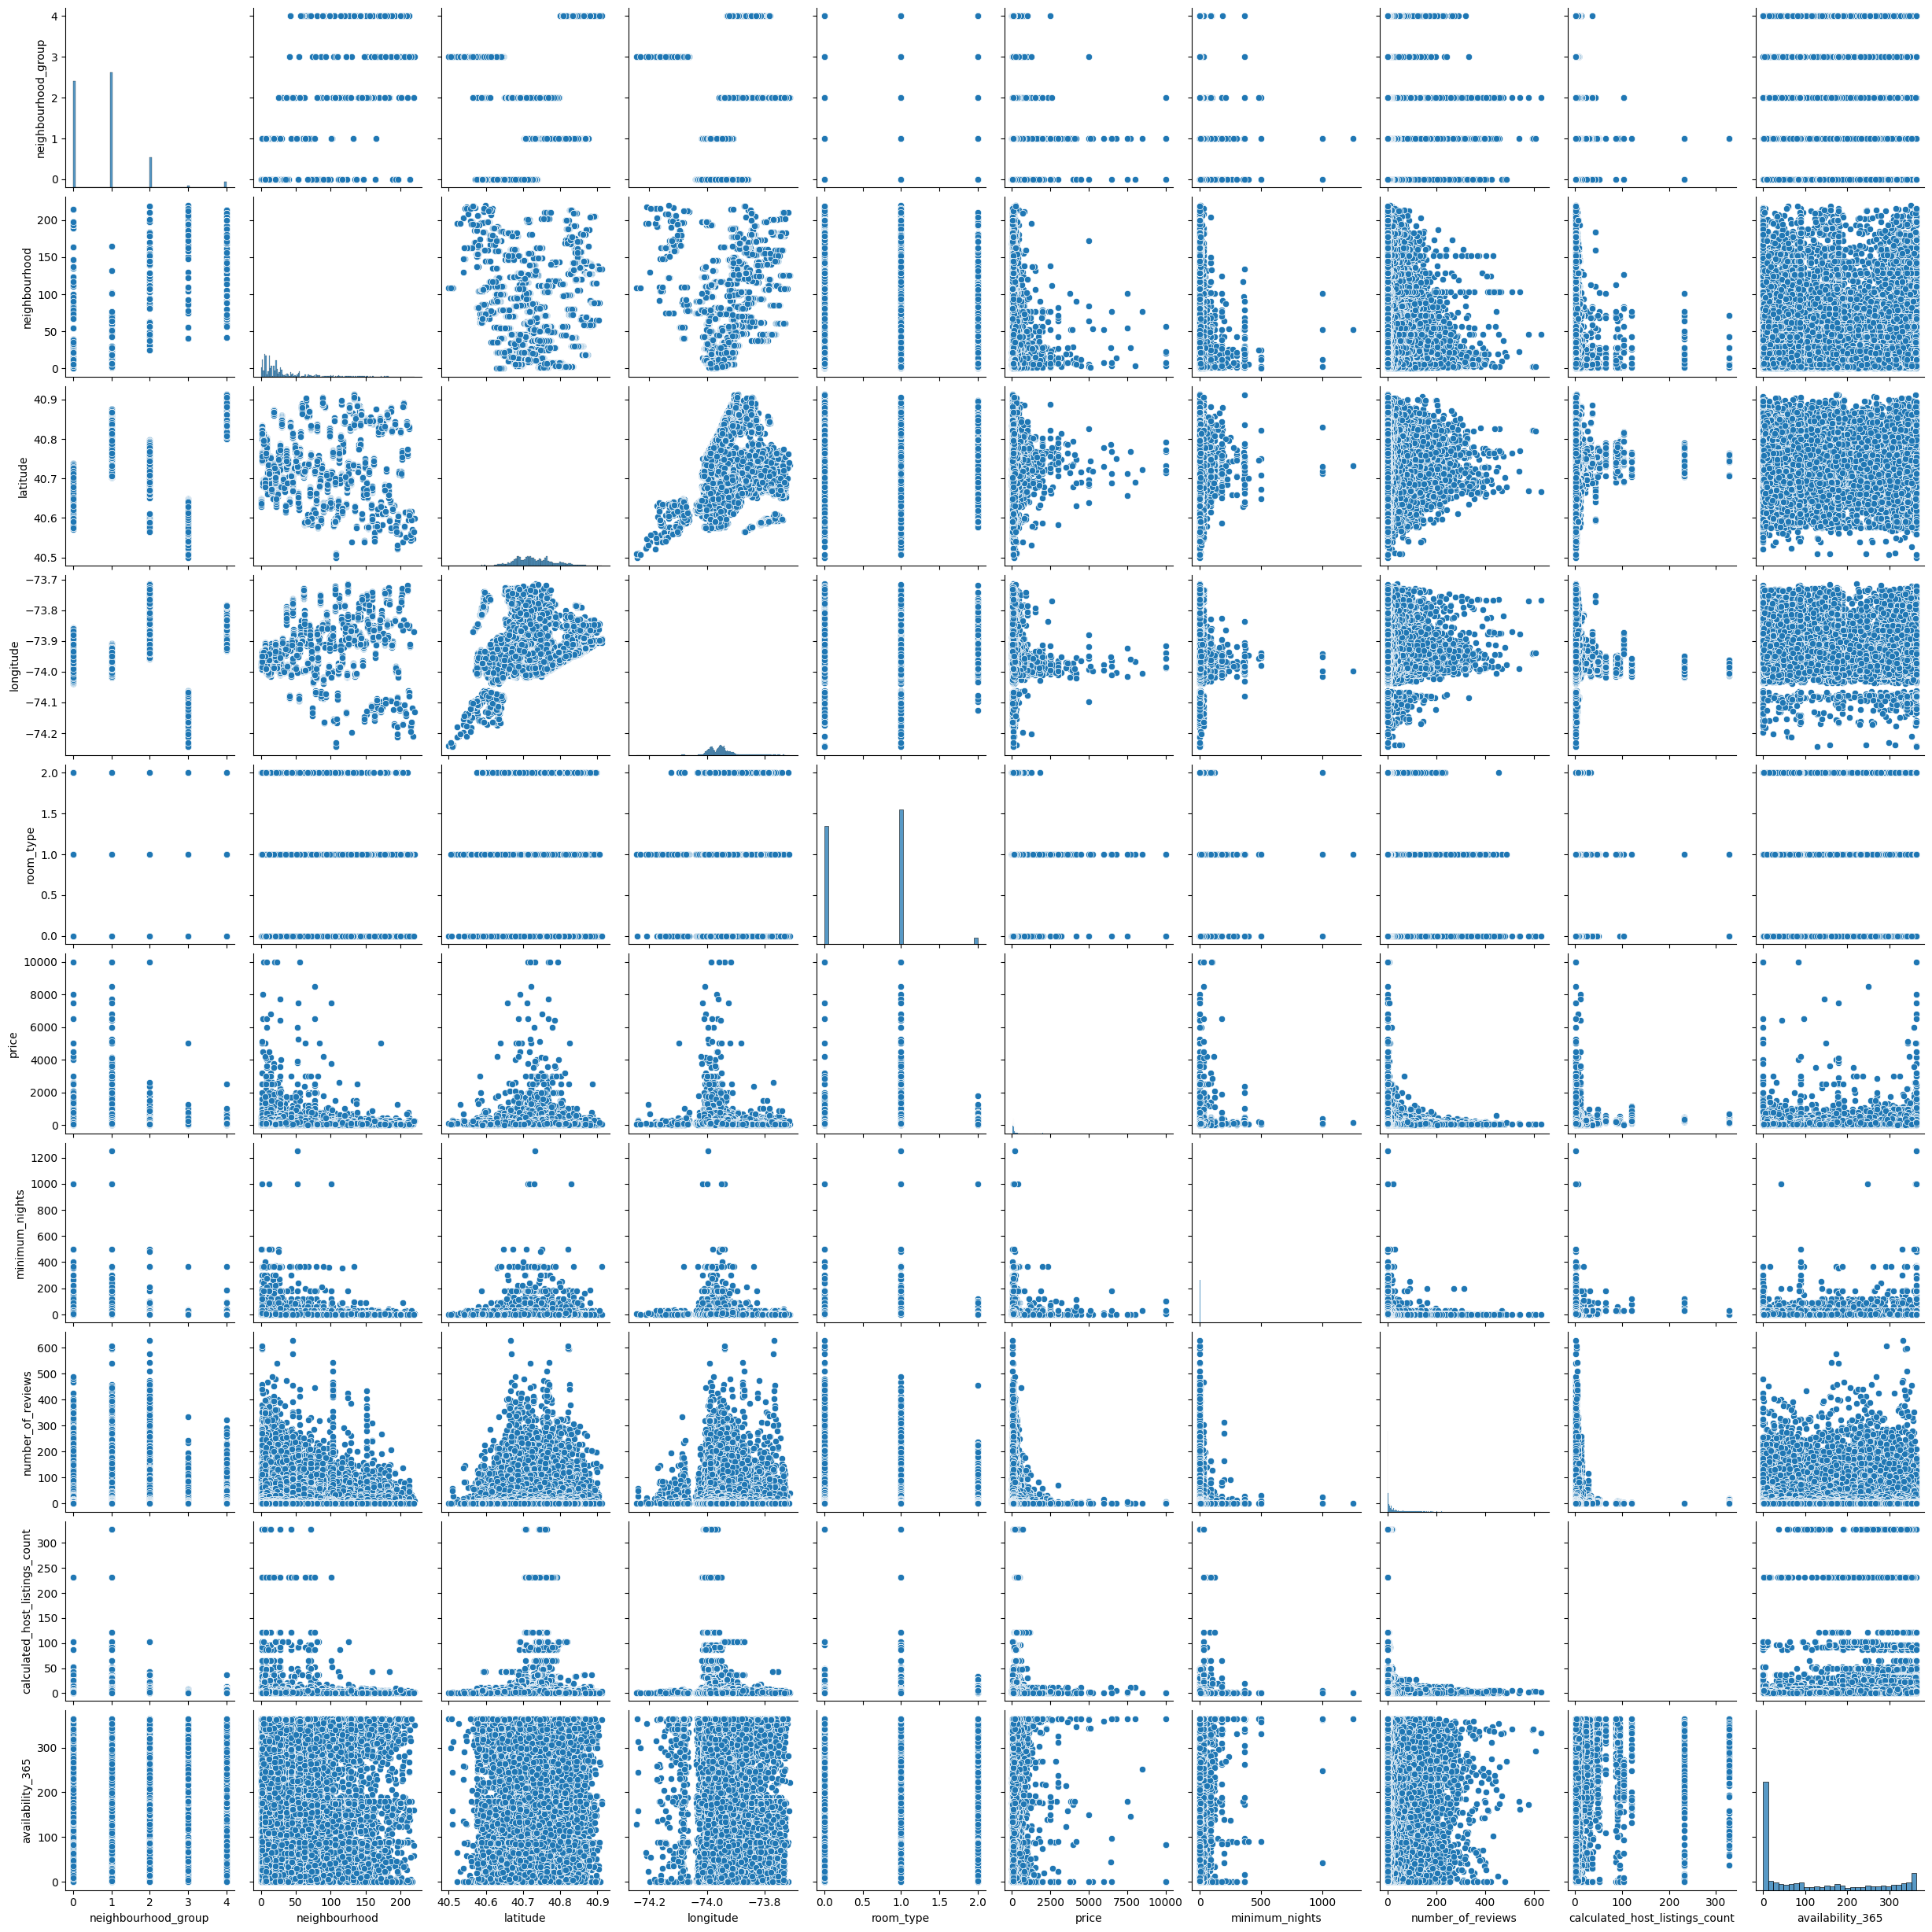

In [47]:
###pairplot 

sns.pairplot(data=df)

In [48]:
##ing de las caracteristicas, modificar columnas , info faltante

df.describe()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,0.786911,29.888782,40.728949,-73.952170,0.567113,152.720687,7.029962,23.274466,7.143982,112.781327
std,0.844386,34.676634,0.054530,0.046157,0.541249,240.154170,20.510550,44.550582,32.952519,131.622289
min,0.000000,0.000000,40.499790,-74.244420,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,0.000000,7.500000,40.690100,-73.983070,0.000000,69.000000,1.000000,1.000000,1.000000,0.000000
50%,1.000000,19.000000,40.723070,-73.955680,1.000000,106.000000,3.000000,5.000000,1.000000,45.000000
75%,1.000000,37.000000,40.763115,-73.936275,1.000000,175.000000,5.000000,24.000000,2.000000,227.000000
max,4.000000,220.000000,40.913060,-73.712990,2.000000,10000.000000,1250.000000,629.000000,327.000000,365.000000


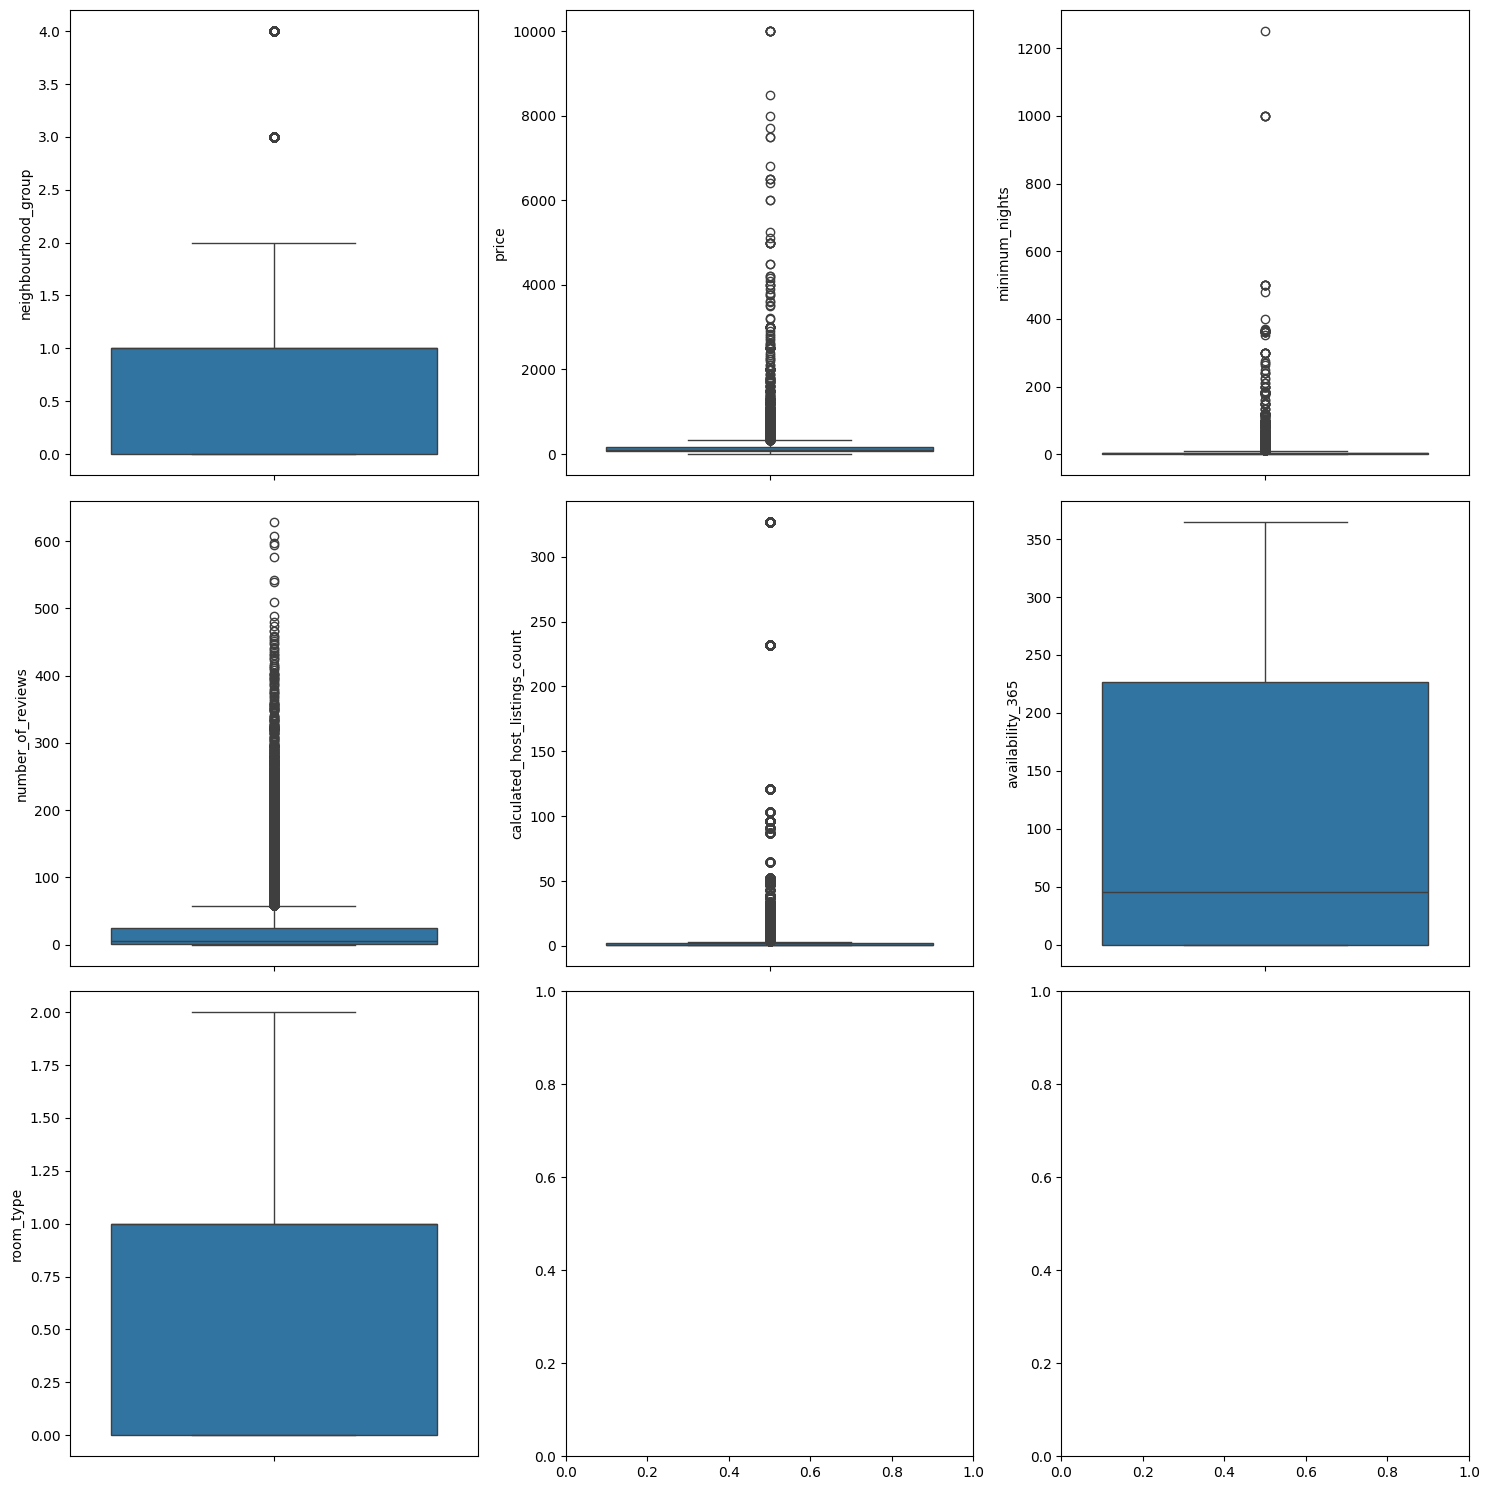

In [54]:

#Los "outliers" (valores atípicos) son puntos de datos que se desvían significativamente del patrón general de los datos en un conjunto de datos. 
#son valores que son notablemente diferentes de los demás 
#y que pueden distorsionar el análisis si no se manejan adecuadamente


fig, axes = plt.subplots(3, 3, figsize = (15, 15))

sns.boxplot(ax = axes[0, 0], data = df, y = "neighbourhood_group")
sns.boxplot(ax = axes[0, 1], data = df, y = "price")
sns.boxplot(ax = axes[0, 2], data = df, y = "minimum_nights")
sns.boxplot(ax = axes[1, 0], data = df, y = "number_of_reviews")
sns.boxplot(ax = axes[1, 1], data = df, y = "calculated_host_listings_count")
sns.boxplot(ax = axes[1, 2], data = df, y = "availability_365")
sns.boxplot(ax = axes[2, 0], data = df, y = "room_type")

plt.tight_layout()

plt.show()

In [57]:
df = df[df['minimum_nights']<=365]

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48881 entries, 0 to 48894
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48881 non-null  int64  
 1   neighbourhood                   48881 non-null  int64  
 2   latitude                        48881 non-null  float64
 3   longitude                       48881 non-null  float64
 4   room_type                       48881 non-null  int64  
 5   price                           48881 non-null  int64  
 6   minimum_nights                  48881 non-null  int64  
 7   number_of_reviews               48881 non-null  int64  
 8   calculated_host_listings_count  48881 non-null  int64  
 9   availability_365                48881 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 4.1 MB


In [58]:
### propiedades precio cero

df = df[df['price']>0]

In [60]:
## valores faltante

df.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [65]:
##scaling Es una técnica que cambia el rango de los valores de los datos para que puedan ser comparables entre sí. 
#El escalado normalmente implica la normalización, que es el proceso de cambiar los valores para que tengan una media de 0 
#y una desviación estándar de 1.
#Otra técnica común es el escalado mínimo-máximo, que transforma los datos para que todos los valores estén entre 0 y 1.

from sklearn.preprocessing import StandardScaler

variables = ["number_of_reviews", "minimum_nights", "calculated_host_listings_count", 
                 "availability_365", "neighbourhood_group", "room_type"]

scaler = StandardScaler()
variables_escaladas = scaler.fit_transform(df[variables])
df_escalado= pd.DataFrame(variables_escaladas, index=df.index, columns=variables)
df_escalado['price'] = df['price']
df_escalado.head()

,number_of_reviews,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group,room_type,price
0,-0.320432,-0.354971,-0.034778,1.917028,-0.932123,-1.047853,149
1,0.487541,-0.354971,-0.156135,1.841037,0.252268,0.800031,225
2,-0.522425,-0.233412,-0.186475,1.917028,0.252268,-1.047853,150
3,5.537374,-0.354971,-0.186475,0.617588,-0.932123,0.800031,89
4,-0.320432,0.192044,-0.186475,-0.856631,0.252268,0.800031,80


In [69]:
## seleccion de caracterizticas Consiste en elegir las características
# más relevantes de un conjunto de datos y descartar las menos importantes. Hay varias razones para realizar este proceso:


from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

X = df_escalado.drop("price", axis = 1)
y = df_escalado["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)


seleccion_model = MinMaxScaler(chi2, k = 4)
seleccion_model.fit(X_train, y_train)
ix = seleccion_model.get_support()
X_train_sel = pd.DataFrame(seleccion_model.transform(X_train), columns = X_train.columns.values[ix])
X_test_sel = pd.DataFrame(seleccion_model.transform(X_test), columns = X_test.columns.values[ix])

X_train_sel.head()

TypeError: MinMaxScaler.__init__() got an unexpected keyword argument 'k'

In [ ]:
X_train_sel["price"] = list(y_train)
X_test_sel["price"] = list(y_test)
X_train_sel.to_csv("../data/processed/clean_train.csv", index = False)
X_test_sel.to_csv("../data/processed/clean_test.csv", index = False)